## Solution of Laplace's equation using relaxation
This is one of the simplest boundary value problems; so simple that it can be solved using one the 
simplest (out of many) strategies for the solution of such problems.  This solution is based on 
+ Example 9.1 in Chapter 9.1 of <i>Computational Physics (revised and expanded)</i> by Mark 
Newman (2013), and 
+ Example 3.3 of <i>Introduction to Electrodynamics</i> by David Griffiths (4th ed.), which provides an 
analytical solution to the same problem using separation of variable, and Fourier series.

This notebook is intended to be an <i>introduction</i> to one simple technique for the solution the simplest
of boundary-value partial differential equation problems $--$ it's an example of how one can acheive the same
results as Griffiths does analytically.  It is not intended to be an introduction to the 
field in general. One broader introduction to the numerical solution of partial differential equations 
can be found in Chapter 17 of <i>Numerical Recipes in C, the Art of Scientic Computing</i> by Press, 
Flannery, Teukolsky, and Vetterling.  This is more a demonstration of principle than a concrete guide  
for generalization to more complex problems.

The basics of this simple technique are described in many webpage, such as Wikipedia's <a href="https://en.wikipedia.org/wiki/Relaxation_(iterative_method)"><i>Relaxation (iterative 
method)</i></a>


#### Comments
+ Griffiths' Example 3.3 and Newman's Example 9.1 are not completely equivalent as stated.  In Griffiths, the distance from the $V_0$ surface at $x=0$ extends to  $\infty$; in Newman's the distance from the $V=0$ surface 
is explitly equal to the width $a$ of Griffiths.  It is straighforward to extend Newman's treatment to 
larger distances.
+ Newman uses explicit looping to update his potential $\phi$.  There are much more concise ways to 
include this looping implicitly, and the concise methods are <i>very</i> much faster. (My initial comparisons
give 198 s  for Newmans's code and $\mu\mbox{s}$ after taking advantange of built-in `numpy` capabilities.
I have downloaded Newman's code into `laplace_Newma.ipynb`. The code below uses 
`np.roll` to shift the array for $\phi$  up one grid step,  down one grid step, left one grid step, and right one grid step, and the results are summed and then divided by 4 in order to update $\phi$. The "broadcasting" of 
the sum of the arrays makes the looping implicit, and this technique is <b>MUCH</b> faster.


In [1]:
import numpy as np

import matplotlib as mpl  
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
# Following is an Ipython magic command that puts figures in the  notebook.
# For figures in separate windows, comment out following line and uncomment
# the next line
# Must come before defaults are changed.
%matplotlib notebook
#%matplotlib

# As of Aug. 2017 reverting to 1.x defaults.
# In 2.x text.ustex requires dvipng, texlive-latex-extra, and texlive-fonts-recommended, 
# which don't seem to be universal
# See https://stackoverflow.com/questions/38906356/error-running-matplotlib-in-latex-type1cm?
mpl.style.use('classic')
        
# M.L. modifications of matplotlib defaults using syntax of v.2.0 
# More info at http://matplotlib.org/2.0.0/users/deflt_style_changes.html
# Changes can also be put in matplotlibrc file, or effected using mpl.rcParams[]
plt.rc('figure', figsize = (6, 4.5))            # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)             # Adjusts supblot parameters for new size

In [3]:
n = 200
m = 100
target = 1e-6
delta = 1

### Initialize array

In [4]:
phi_old = np.zeros([n+1,m+1])
phi_old[:, 0] = phi_old[:0] = 0  # Boundary values
phi_old[0,:] = 1                 # Boundary values

### Calculate new potential

In [5]:
while delta > target:
    phi_new  = (np.roll(phi_old, 1, axis=0) + np.roll(phi_old, -1, axis=0) + np.roll(phi_old, 1, axis=1) \
               + np.roll(phi_old, -1, axis=1))/4
    phi_new[:, 0] = phi_new[:,m] = 0  # Restore boundaries
    phi_new[n,:] = 0                  # Restore boundary
    phi_new[0,:] = 1                  # Restore boundary
    delta = np.max(abs(phi_new - phi_old)) 
    phi_new, phi_old = phi_old, phi_new # phi_new --> phi_old for next iteration
     
#print(phi)

### Plot

<IPython.core.display.Javascript object>


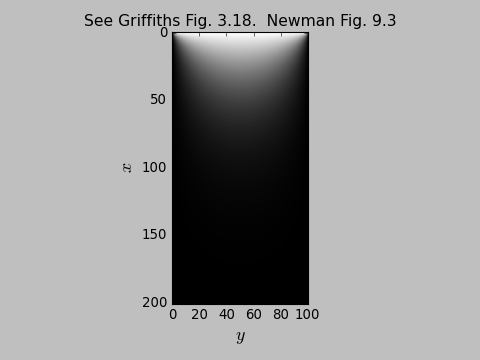

In [6]:
plt.figure()
plt.xlabel('$y$')
plt.ylabel('$x$')
plt.title('See Griffiths Fig. 3.18.  Newman Fig. 9.3')
plt.imshow(phi_old, cmap='gray');



<IPython.core.display.Javascript object>


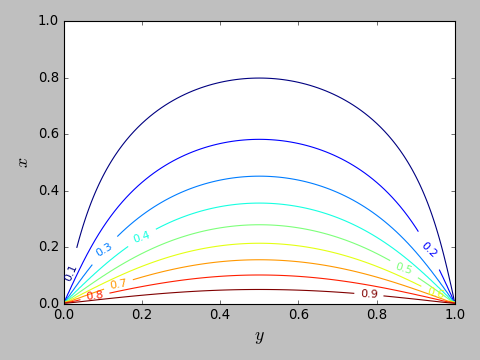

In [7]:
plt.figure()
X = np.linspace(0,1,m+1)
Y = np.linspace(0, 2, n+1)
#CS = plt.contour(X, Y, phi)
CS = plt.contour(X, Y, phi_old, levels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.clabel(CS, inline=1, fontsize=10)
plt.ylabel('$x$')
plt.xlabel('$y$')
plt.ylim(0,1);

### Version Information 
`version_information` is from J.R. Johansson (jrjohansson at gmail.com)<br>
See Introduction to scientific computing with Python:<br>
http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb <br>
for more information and instructions for package installation.<br>

If `version_information` has been installed system wide (as it has been on Bucknell linux computers with shared file systems), continue with next cell as written.  If not, comment out top line in next cell and uncomment the second line.

In [8]:
%load_ext version_information

In [9]:
version_information numpy, scipy,  matplotlib

Software versions
Python 3.7.13 64bit [GCC 7.5.0]
IPython 7.31.1
OS Linux 4.9.0 9 amd64 x86_64 with debian 9.13
numpy 1.21.5
scipy 1.7.3
matplotlib 3.5.2
Mon Nov 14 14:15:09 2022 EST